# Normal Equation

# Regression

In statistics, the objective of Regression Analysis is to estimate the relationship among variables. Using Linear Regression, we can describe a relationship between variables with a linear function. We can use such a function to estimate the target variable for one or more input variables. Often, the target variable takes on a real number as its value.

By applying regression, we hope to find some function `f(x)` that for any given input variable $x$ predicts our target variable $y$. We call this the **target function** or the **true function**:

$$
f(x) = y
$$

# Hypothesis

A **hypothesis** is a function that we hope (hypothesize) is similar to the true function. So for the case of predicting the quality of wine, a function that takes some input variables about a wine and then correctly predicts the quality of that wine. In the case of linear regression over a single input variable $x$, we hope that we can find some linear function that correctly predicts our target variable $y$. The estimated target variable is written as $\widehat{y}$. For a linear function, we need to fit two **parameters**: the intercept (the y-value as $x=0$) and the slope (the extent to which $y$ changes with $x$). For convenience, we store those two parameters in a vector $theta$: $\theta_0$ is the intercept and $\theta_1$ is the slope. We say that the hypothesis $h$ is parameterized by the coefficients in $\theta$ and therefore write $h_\theta$ (pronounced as 'h over $\theta$'):

$$ 
h_\theta(x) = \widehat{y} = \theta_1 * x + \theta_0
$$

# Cost function

Our hypothesis consists of two parts, the shape of the function (in this case a first degree equation) and its parameters. If we have chosen the shape, our next task is to find the parameters that are most optimal for the problem. For linear regression, we commonly use the **sum of least squares** to indicate how good the parameters fit the data. More formally, we define a cost function $J(\theta)$ that indicates how good the parameters fit the data. For linear regression, we simply sum the squared difference between the predicted value and the true value for every training sample. To distinguish between samples in de dataset, we write $x^{(i)}$ and $y^{(i)}$ to reference the training sample at row $i$.

$$ J(\theta) = \sum_i \left( h_\theta(x^{(i)}) - y^{(i)} \right) ^2  = \sum_i \left( \theta_1 * x^{(i)} + \theta_0 - y^{(i)} \right)^2 $$

# Vector notation

In Machine Learning, we often write our equations in vector notation. Vector notations are shorter, but we will also see that we can write our programming code in vector notation. Using the same language means that we are less likely to make mistakes in translating our learning objective to code, and as an added bonus the code is often a lot faster. 

We can **vectorize** our learning objective by rewriting our hypothesis as a vector product. Because we have two parameters in $\theta$, we also need two values in $x$ so that their product equals the original hypothesis. We do this by adding a **bias** value of 1 to every $x$, so that we get:

$$ x = \left[ \begin{matrix} x_0 = bias = 1 \\ x_1 = feature \end{matrix} \right], \theta = \left[ \begin{matrix} \theta_0 = \text{intercept} \\ \theta_1 = slope \end{matrix} \right], \text{having}\ x_0 = 1
$$

We can then rewrite the hypothesis as a vector product (for newcomers to vector notations: $\theta^T$ is the *transpose* of $\theta$, which in this case is a row vector of $\theta$):

$$h_\theta(x) = \theta^T \cdot x = \theta_0 * x_0 + \theta_1 * x_1$$

Using vector notation, our cost function becomes:

$$ J(\theta) = \sum_i \left( \theta^T \cdot x^{(i)} - y^{(i)} \right)^2 $$

# Data matrix

The next step in vectoriation is to place our training samples in a **Data matrix**. We define a matrix $X$ in which the input samples $(x^{(i)})$ are placed as row vectors $(x^{(i)})^T$:

$$ X = \left[ \begin{matrix} 
x_0^{(0)} & x_1^{(0)} \\
x_0^{(1)} & x_1^{(1)} \\
\dots & \dots \\
x_0^{(m-1)} & x_1^{(m-1)}
\end{matrix} \right]
$$

Since $y$ is a column vector of the target variable, we can rewrite the cost function as a matrix multiplication. To make the transformation complete, we also replace the square by a matrix dot product:

$$ J(\theta) = \sum_i \left( \theta^T \cdot x_i - y^{(i)} \right)^2 = (X \cdot \theta - y)^T \cdot (X \cdot \theta - y) $$ 

# Normal Equation

Now that we have rewritten our cost function into vector notation, we can analytically determine for which values of $\theta$ the cost function is minimal. Beacuse the cost function is a squared or second order function, we know that it must looks like a parabole or bowl shape. The minimum is where the derivative equals zero:

$$ \frac{\delta J(\theta)}{\delta \theta} = 2X^TX\theta - 2X^Ty = 0 $$

If you solve this linear algebra equation you get the so-called Normal Equation that gives you the optimal $\theta$ for the cost function:

$$ \theta = (X^TX)^{-1} \cdot X^Ty $$

# Data

The data loader in the ML library already sets up the input in a data matrix $X$ and a target vector $y$. The predefined models (e.g. linear_regression_ne, knn) already add a bias column, so we do not need to add that. And the underlying implementation wants the target vector $y$ to be a row vector instead of a column vector. To setup the data with a bias column and the column vector for the target variable we add `bias=True` and `column_y=True`. 

Note: we only need to transform the data for implementing the mathematical derivation, do not use this when using ML or SKLearn.

In [1]:
from ml import *

In [2]:
# load the data, but include a bias parameter
data = advertising_sales_tv(bias=True, column_y=True)
X = data.train_X
y = data.train_y

In [3]:
X

array([[  1. ,  93.9],
       [  1. ,  75.1],
       [  1. ,   4.1],
       [  1. , 195.4],
       [  1. , 261.3],
       [  1. , 276.9],
       [  1. , 141.3],
       [  1. ,   0.7],
       [  1. , 228.3],
       [  1. , 171.3],
       [  1. , 112.9],
       [  1. , 187.9],
       [  1. , 109.8],
       [  1. ,   8.4],
       [  1. , 255.4],
       [  1. ,   7.8],
       [  1. , 281.4],
       [  1. , 292.9],
       [  1. , 276.7],
       [  1. , 188.4],
       [  1. , 120.5],
       [  1. , 129.4],
       [  1. , 109.8],
       [  1. ,   5.4],
       [  1. , 293.6],
       [  1. , 219.8],
       [  1. ,  17.2],
       [  1. ,  97.5],
       [  1. , 240.1],
       [  1. , 213.4],
       [  1. ,   8.7],
       [  1. ,  78.2],
       [  1. , 280.2],
       [  1. , 218.5],
       [  1. ,  18.8],
       [  1. , 215.4],
       [  1. , 164.5],
       [  1. ,  62.3],
       [  1. ,  96.2],
       [  1. , 217.7],
       [  1. ,   8.6],
       [  1. , 182.6],
       [  1. , 240.1],
       [  1

In [4]:
y

array([[15.3],
       [12.6],
       [ 3.2],
       [22.4],
       [24.2],
       [27. ],
       [15.5],
       [ 1.6],
       [20.5],
       [16. ],
       [11.9],
       [19.7],
       [16.7],
       [ 5.7],
       [19.8],
       [ 6.6],
       [24.4],
       [21.4],
       [16.8],
       [19.9],
       [14.2],
       [11. ],
       [12.4],
       [ 5.3],
       [20.7],
       [19.6],
       [ 5.9],
       [13.7],
       [18.2],
       [17. ],
       [ 7.2],
       [14.6],
       [19.8],
       [17.2],
       [ 7. ],
       [17.1],
       [17.5],
       [ 9.7],
       [12.3],
       [19.4],
       [ 4.8],
       [21.2],
       [20.9],
       [15. ],
       [15.9],
       [18. ],
       [17.9],
       [13.2],
       [16.9],
       [ 5.6],
       [15.5],
       [17.3],
       [16.4],
       [16. ],
       [10.8],
       [14. ],
       [10.9],
       [19.6],
       [11.6],
       [16.1],
       [17.8],
       [11.3],
       [16.4],
       [10.6],
       [25.4],
       [12.5],
       [14

# Normal Equation

Now that we have rewritten our cost function into vector notation, we can analytically determine for which values of $\theta$ the cost function is minimal. Beacuse the cost function is a squared or second order function, we know that it must looks like a parabole or bowl shape. The minimum is where the derivative equals zero:

$$ \frac{\delta J(\theta)}{\delta \theta} = 2X^TX\theta - 2X^Ty = 0 $$

If you solve this linear algebra equation you get the so-called Normal Equation that gives you the optimal $\theta$ for the cost function:

$$ \theta = (X^TX)^{-1} \cdot X^Ty $$

# Model & Training

Now that we have prepared our data in $X$ and $y$, we can use the Normal Equation to compute $\theta$. 

In Python, the **Numpy** library is the standard to store the vectors and matrices and to efficiently perform linear algebra operations on them. Some of the operators are slightly different from what you are used, the `@` operator performs a dot product between matrices and the `.T` transposes a matrix.

We also need to compute the inverse of $X^TX$, which we can do with numpy's pseudo inverse `np.linalg.pinv()`. It is recommended to use the pseudo-inverse because this give a numerical more stable answer.

# Training

In [5]:
𝜃 = np.linalg.pinv( X.T @ X ) @ X.T @ y

In [6]:
𝜃

array([[6.93850405],
       [0.05524176]])

Perhaps at the beginning of this, you would not have thought learning a model would be this easy, but sometimes applying math does make for a very elegant solution (see: the unreasonable effectiveness of mathematics (Wigner, 1960)).

So now we have learned $\theta$, we know what the parameters to our regression line $\widehat{quality} = \theta_1 \cdot alcohol + \theta_0$ are:

# Evaluate

Now that we have estimated our model $\theta$, we can use it to make predictions. For a single data point, we can compute $\theta^T \cdot x$ and for multiple data points we can add them to a data matrix $X$ and compute $X \cdot \theta$.

To plot the result we can use the pyplot module in the Matplotlib library (imported as `plt`. In matplotlib, `plot` is the general function that draws a figure. By passing '.' as the third parameter we change the mode from the default line-graph to a scatter-graph. 

To plot a regression line, we compute two points. Since the min/max feature values are resp. 0 and 300, we construct a data matrix with those two points and added a bias=1 to them. Then we can simply multiply the data matrix with $\theta$ and we get predicted Sales for those two points in `line_y`. We then use Matplotlib to draw a line over the Scatter plot. In that code, `line_X[:, 1]` is the Numpy way to select all rows (indicated by only the alcohol percentages; all rows (indicated by the :) and just the column indexed by 1 (so it leaves out the bias).

Always add labels to your graphs! We can add a title, xlabel and ylabel with the statements below.

In [7]:
X @ 𝜃

array([[12.12570541],
       [11.08716031],
       [ 7.16499527],
       [17.73274416],
       [21.37317622],
       [22.23494769],
       [14.74416489],
       [ 6.97717328],
       [19.5501981 ],
       [16.40141772],
       [13.17529887],
       [17.31843095],
       [13.00404942],
       [ 7.40253484],
       [21.04724983],
       [ 7.36938979],
       [22.48353561],
       [23.11881587],
       [22.22389934],
       [17.34605184],
       [13.59513626],
       [14.08678793],
       [13.00404942],
       [ 7.23680956],
       [23.1574851 ],
       [19.08064313],
       [ 7.88866234],
       [12.32457575],
       [20.20205088],
       [18.72709586],
       [ 7.41910737],
       [11.25840977],
       [22.4172455 ],
       [19.00882884],
       [ 7.97704916],
       [18.83757938],
       [16.02577375],
       [10.38006576],
       [12.25276147],
       [18.96463543],
       [ 7.4135832 ],
       [17.02564962],
       [20.20205088],
       [14.5563429 ],
       [13.88239342],
       [15

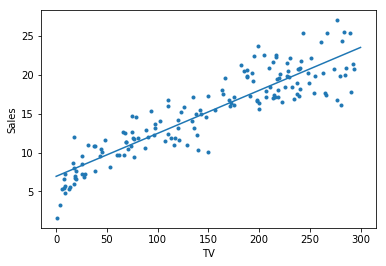

In [8]:
data.plot(x=1)
line_X = np.array([[1, 0], [1 ,300]]) # 1 in de eerste kolom is de bias
line_y = line_X @ 𝜃
plt.plot(line_X[:, 1], line_y, '-');